In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Amazon Sale Report.csv')
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

<ipython-input-1-1f23aeb0a8b9>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/Amazon Sale Report.csv')


##**1)Total Number of Orders**

In [ ]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
total_orders = df['Order ID'].nunique()
print(f"Total number of orders: {total_orders}")

Total number of orders: 120378


##**2)Total Revenue Generated by Shipped Order**

In [ ]:
shipped_orders = df[df['Status'].str.contains('Shipped', case=False, na=False)]
total_revenue_shipped = shipped_orders['Amount'].sum()
print(f"Total revenue generated from shipped orders: ₹{total_revenue_shipped}")


Total revenue generated from shipped orders: ₹71050985.0


##**3)Average order value (AOV) for shipped orders**

In [ ]:
average_order_value_shipped = total_revenue_shipped / shipped_orders['Order ID'].nunique()
print(f"Average order value (AOV) for shipped orders: ₹{average_order_value_shipped:.2f}")

Average order value (AOV) for shipped orders: ₹694.27


##**4)Category with the highest number of order**

In [ ]:
top_category = df['Category'].value_counts().idxmax()
top_category_count = df['Category'].value_counts().max()
print(f"Category with the highest number of orders: {top_category} ({top_category_count} orders)")

Category with the highest number of orders: Set (50284 orders)


##**5)Percentage of orders that were cancelled**

In [ ]:
cancelled_orders = df[df['Status'].str.contains('Cancelled', case=False, na=False)]
cancelled_percentage = (cancelled_orders['Order ID'].nunique() / total_orders) * 100
print(f"Percentage of orders that were cancelled: {cancelled_percentage:.2f}%")

Percentage of orders that were cancelled: 14.28%


##**6)Most Cancelled order city wise and its Avg Price**

In [ ]:
bengaluru_cancelled_orders = df[(df['ship-city'] == 'BENGALURU') & (df['Status'].str.contains('Cancelled', case=False, na=False))]
most_common_category_bengaluru = bengaluru_cancelled_orders['Category'].value_counts().idxmax()
avg_price_bengaluru_cancelled = bengaluru_cancelled_orders['Amount'].mean()
print(f"The most common type of clothing in canceled orders in Bengaluru is: {most_common_category_bengaluru}")
print(f"The overall average price of canceled orders in Bengaluru is: ₹{avg_price_bengaluru_cancelled:.2f}")

The most common type of clothing in canceled orders in Bengaluru is: kurta
The overall average price of canceled orders in Bengaluru is: ₹635.12


##**7)Top-selling product style**

In [ ]:
top_selling_style = df['Style'].value_counts().idxmax()
top_selling_style_count = df['Style'].value_counts().max()
print(f"Top-selling product style: {top_selling_style} ({top_selling_style_count} orders)")

Top-selling product style: JNE3797 (4224 orders)


##**8)State that generated the highest sales revenue**

In [ ]:
state_revenue = df.groupby('ship-state')['Amount'].sum().idxmax()
highest_state_revenue = df.groupby('ship-state')['Amount'].sum().max()

print(f"State that generated the highest sales revenue: {state_revenue} with ₹{highest_state_revenue}")


State that generated the highest sales revenue: MAHARASHTRA with ₹13335534.14


##**9)Number of orders using expedited shipping**

In [ ]:
expedited_shipping_count = df[df['ship-service-level'].str.contains('Expedited', case=False, na=False)]['Order ID'].nunique()
print(f"Number of orders using expedited shipping: {expedited_shipping_count}")

Number of orders using expedited shipping: 82922


##**10)Detail of Costliest Order**

In [ ]:
costliest_order = df.loc[df['Amount'].idxmax()]
print("Details of the costliest order item:")
print(costliest_order)

Details of the costliest order item:
index                               42039
Order ID              402-5239558-4281957
Date                             04-05-22
Status                            Shipped
Fulfilment                         Amazon
Sales Channel                   Amazon.in
ship-service-level              Expedited
Style                              SET268
SKU                       SET268-KR-NP-XS
Category                              Set
Size                                   XS
ASIN                           B08XQBXFPP
Courier Status                    Shipped
Qty                                     8
currency                              INR
Amount                             5584.0
ship-city                          GUNTUR
ship-state                 ANDHRA PRADESH
ship-postal-code                 522007.0
ship-country                           IN
promotion-ids                         NaN
B2B                                 False
fulfilled-by                          N

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Amazon Sale Report.csv')

<ipython-input-5-7fcd346ec2a7>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/Amazon Sale Report.csv')


#**Some Useful Graphs**

##**1) Revenue by top 10 State**

<ipython-input-19-695ec6db147e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_state.index, y=revenue_by_state.values, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

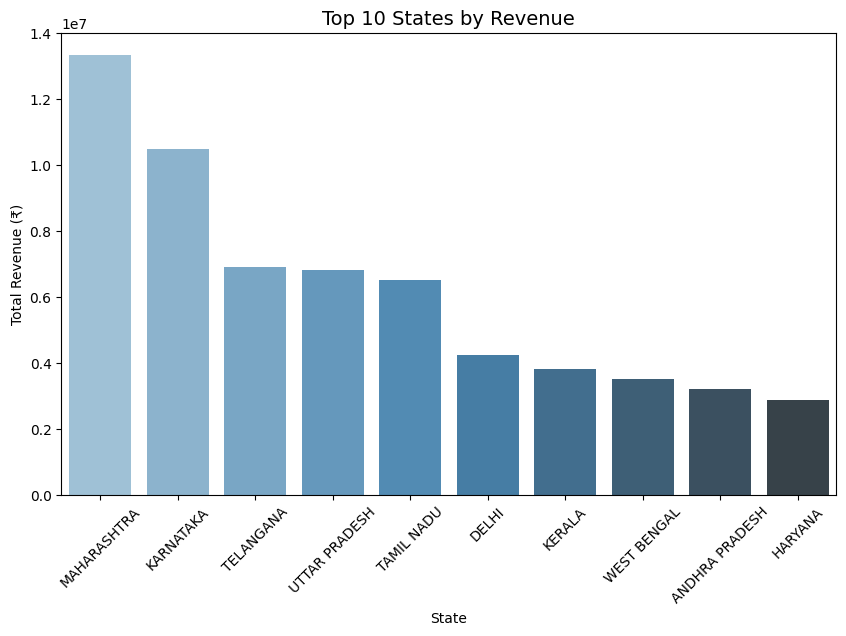

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by 'ship-state' and summing the 'Amount' for each state
revenue_by_state = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

# Creating a bar plot for top 10 states by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_state.index, y=revenue_by_state.values, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Top 10 States by Revenue', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Revenue (₹)')
plt.show()



##**Most Shipped Categories**

<ipython-input-29-e21fc688d6f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quantity_shipped_by_category.index, y=quantity_shipped_by_category.values, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: 

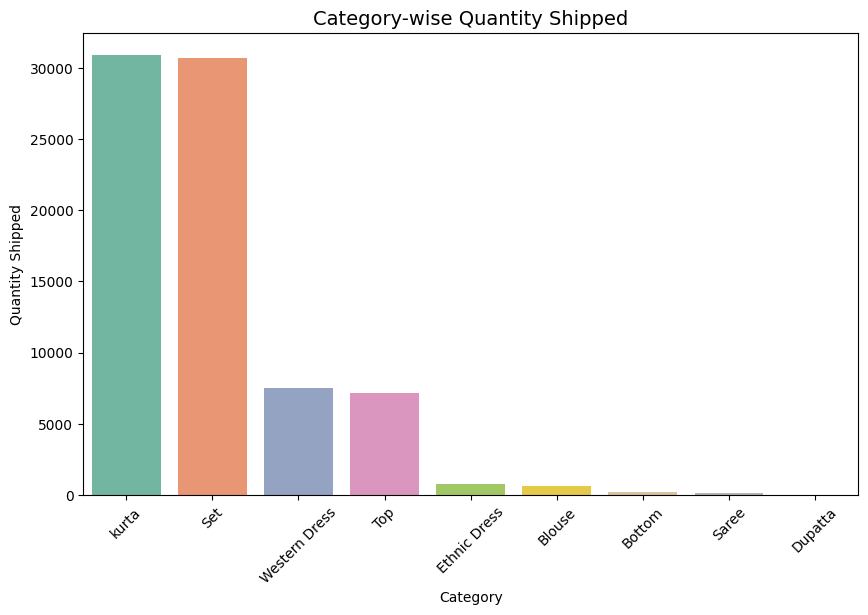

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering for only shipped orders
shipped_orders = df[df['Status'] == 'Shipped']

# Grouping by category and summing the quantity of shipped items
quantity_shipped_by_category = shipped_orders.groupby('Category')['Qty'].sum().sort_values(ascending=False)

# Creating a bar plot for category-wise quantity shipped
plt.figure(figsize=(10, 6))
sns.barplot(x=quantity_shipped_by_category.index, y=quantity_shipped_by_category.values, palette='Set2')
plt.xticks(rotation=45)
plt.title('Category-wise Quantity Shipped', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Quantity Shipped')
plt.show()


##**Average Order Value (AOV) by Product Category**

<ipython-input-31-31f0ee1afdb1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aov_by_category.index, y=aov_by_category.values, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

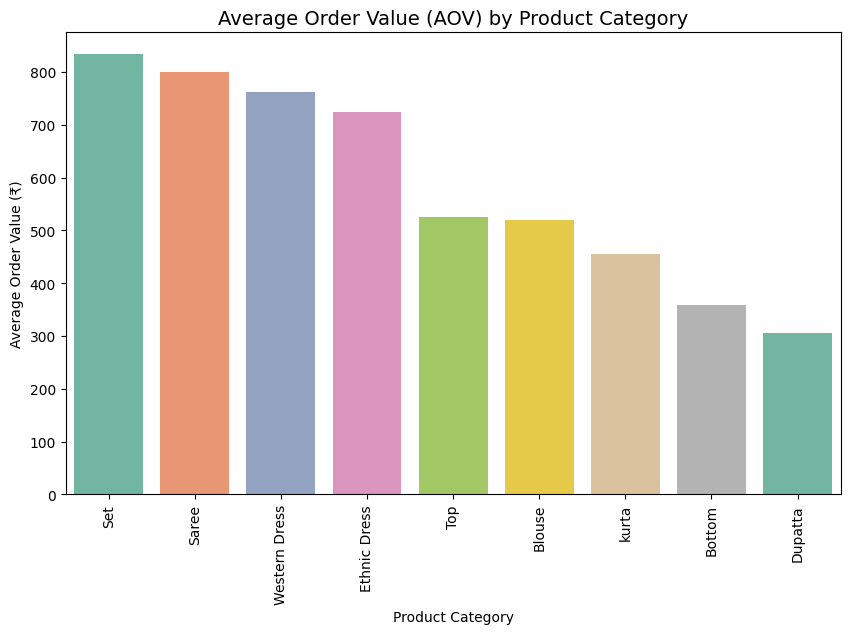

In [ ]:
# Grouping data by 'category' and calculating the average 'Amount' for each category
aov_by_category = df.groupby('Category')['Amount'].mean().sort_values(ascending=False)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=aov_by_category.index, y=aov_by_category.values, palette='Set2')
plt.xticks(rotation=90)
plt.title('Average Order Value (AOV) by Product Category', fontsize=14)
plt.xlabel('Product Category')
plt.ylabel('Average Order Value (₹)')
plt.show()


##**Increase in Revenue by Month**

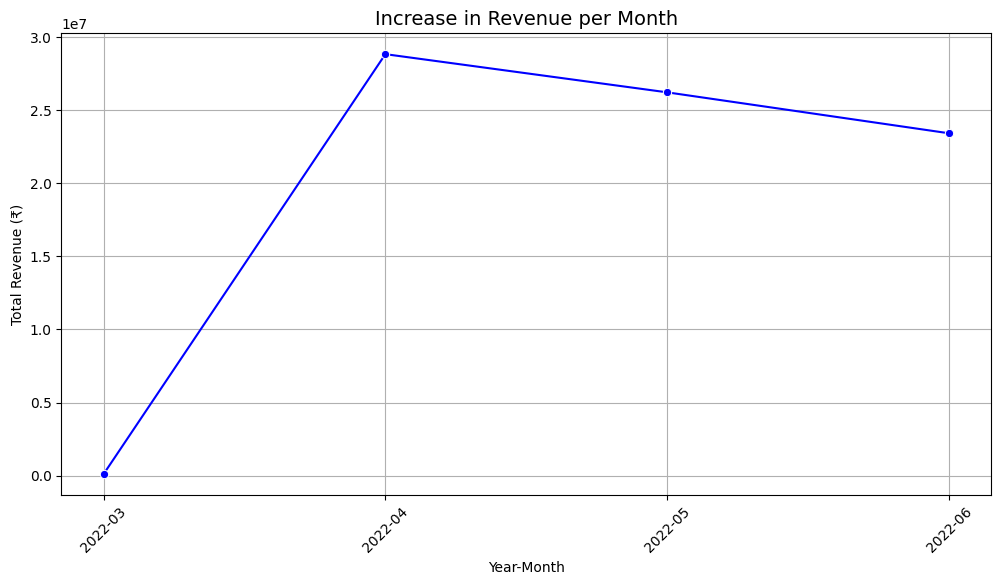

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure that the 'order-date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting the year and month from the 'order-date' column
df['year_month'] = df['Date'].dt.to_period('M')

# Grouping by year and month, and summing the 'Amount' column to calculate total revenue per month
revenue_per_month = df.groupby('year_month')['Amount'].sum().sort_index()

# Creating a line plot to show revenue increase over the months
plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_per_month.index.astype(str), y=revenue_per_month.values, marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Increase in Revenue per Month', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (₹)')
plt.grid(True)
plt.show()
